# **LEVEL 2**

## **Task 1: Restaurant Ratings**

**Analyze the distribution of aggregate ratings and determine the most common rating range.**  
**Calculate the average number of votes received by restaurants.**


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

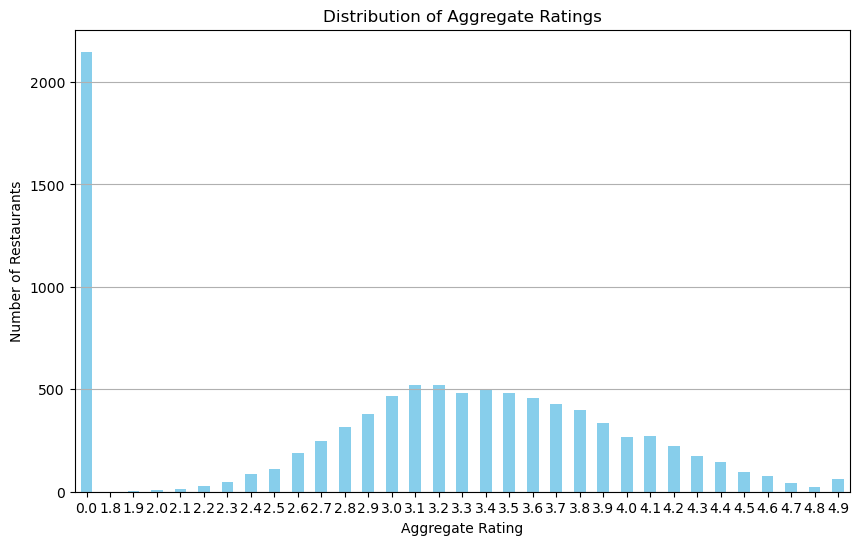

The most common aggregate rating is: 0.0
The average number of votes received by restaurants is: 156.91


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = ("Dataset .csv")
data = pd.read_csv(file_path)

# Display rows of the dataset
print(data.head())

# Analyze the distribution of aggregate ratings
rating_distribution = data['Aggregate rating'].value_counts().sort_index()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Determine the most common rating range
most_common_rating = rating_distribution.idxmax()
print(f"The most common aggregate rating is: {most_common_rating}")

# Calculate the average number of votes received by restaurants
average_votes = data['Votes'].mean()
print(f"The average number of votes received by restaurants is: {average_votes:.2f}")


## **Task 2: Cuisine Combination**

**Identify the most common combinations of
cuisines in the dataset.
Determine if certain cuisine combinations
tend to have higher ratings**

In [29]:
# Load dataset
file_path = ("Dataset .csv")
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

(None,
    Restaurant ID         Restaurant Name  Country Code              City  \
 0        6317637        Le Petit Souffle           162       Makati City   
 1        6304287        Izakaya Kikufuji           162       Makati City   
 2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
 3        6318506                    Ooma           162  Mandaluyong City   
 4        6314302             Sambo Kojin           162  Mandaluyong City   
 
                                              Address  \
 0  Third Floor, Century City Mall, Kalayaan Avenu...   
 1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
 2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
 3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
 4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
 
                                      Locality  \
 0   Century City Mall, Poblacion, Makati City   
 1  Little Tokyo, Legaspi Village, Makati City   
 2  Edsa Shangri-La, Ortigas, Manda

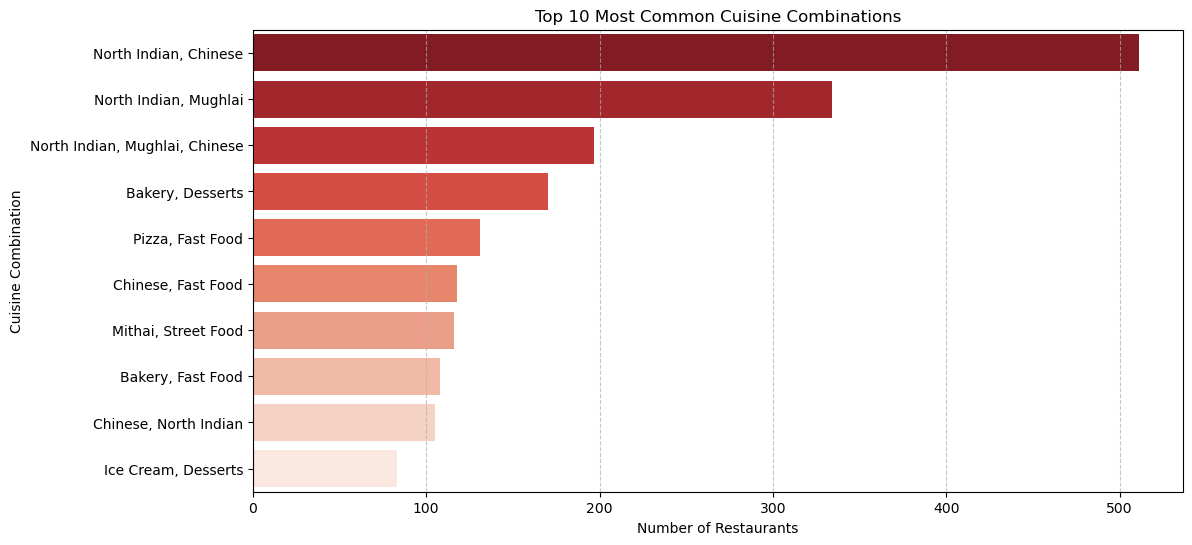

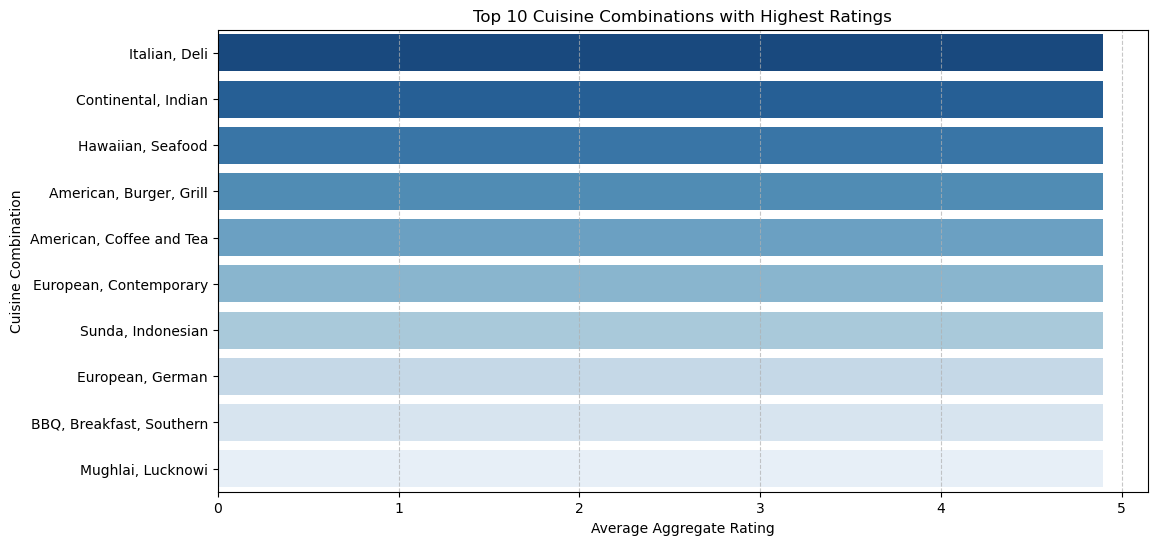

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Dataset .csv"
df = pd.read_csv(file_path)

# Drop missing values in 'Cuisines' column
df = df.dropna(subset=["Cuisines"])

# Filter out single cuisines, keeping only combinations
df_combinations = df[df["Cuisines"].str.contains(",")]

# Identify the most common cuisine combinations (Top 10)
common_combinations = df_combinations["Cuisines"].value_counts().head(10)

# Plot the most common cuisine combinations
plt.figure(figsize=(12, 6))
sns.barplot(y=common_combinations.index, x=common_combinations.values, palette="Reds_r")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Find cuisine combinations with the highest average ratings (Top 10)
top_rated_combinations = df_combinations.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)

# Plot highest-rated cuisine combinations
plt.figure(figsize=(12, 6))
sns.barplot(y=top_rated_combinations.index, x=top_rated_combinations.values, palette="Blues_r")
plt.xlabel("Average Aggregate Rating")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Cuisine Combinations with Highest Ratings")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [31]:
# Print final results
print("Final Analysis:")
print("\n1. The Top 10 Most Common Cuisine Combinations:")
print(common_combinations)

print("\n2. The Top 10 Cuisine Combinations with Highest Ratings:")
print(top_rated_combinations)


Final Analysis:

1. The Top 10 Most Common Cuisine Combinations:
Cuisines
North Indian, Chinese             511
North Indian, Mughlai             334
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
Bakery, Fast Food                 108
Chinese, North Indian             105
Ice Cream, Desserts                83
Name: count, dtype: int64

2. The Top 10 Cuisine Combinations with Highest Ratings:
Cuisines
Italian, Deli               4.9
Continental, Indian         4.9
Hawaiian, Seafood           4.9
American, Burger, Grill     4.9
American, Coffee and Tea    4.9
European, Contemporary      4.9
Sunda, Indonesian           4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
Mughlai, Lucknowi           4.9
Name: Aggregate rating, dtype: float64


## **Task 3: Geographic Analysis**

**Plot the locations of restaurants on a map using longitude and latitude coordinates.**

**Identify any patterns or clusters of restaurants in specific areas.**


In [38]:
pip install pandas folium


Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
df = pd.read_csv("Dataset .csv")

# Display basic information
df.info()

# Check the first few rows
df.head()

# Ensure relevant columns exist
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Remove any invalid or missing coordinates
    df = df[['Latitude', 'Longitude']].dropna()
    
    # Convert columns to appropriate types
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
    
    # Define the starting location as the mean of available coordinates
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    
    # Create a folium map
    restaurant_map = folium.Map(location=map_center, zoom_start=12)
    marker_cluster = MarkerCluster().add_to(restaurant_map)
    
    # Add markers to the map
    for idx, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(marker_cluster)
    
    # Display the map
    restaurant_map.save("restaurant_map.html")
    from IPython.display import display
    display(restaurant_map)
else:
    print("Required columns not found in the dataset.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
# Printing insights based on the map analysis
print(" Geographic Analysis Insights:")

print("1. Dense restaurant clusters appear in urban & commercial areas, indicating high food demand/restaurant chain devlopment.")
print("2. Fewer restaurants in outskirts & residential zones, likely due to lower foot traffic.")
print("3. High restaurant density near major roads & intersections suggests accessibility is key.")
print("4. Possible business opportunities in areas with fewer restaurants (less competition).")
print("5. The interactive map helps visualize restaurant distribution more effectively.")

 Geographic Analysis Insights:
1. Dense restaurant clusters appear in urban & commercial areas, indicating high food demand/restaurant chain devlopment.
2. Fewer restaurants in outskirts & residential zones, likely due to lower foot traffic.
3. High restaurant density near major roads & intersections suggests accessibility is key.
4. Possible business opportunities in areas with fewer restaurants (less competition).
5. The interactive map helps visualize restaurant distribution more effectively.


## **Task 4:Restaurant Chains**

**Identify if there are any restaurant chains present in the dataset.**

**Analyze the ratings and popularity of different restaurant chains.**


In [40]:
#Import library  
import pandas as pd

# Load the dataset
file_path = "Dataset .csv"


df = pd.read_csv(file_path)


df.info(), df.head()
# Group by restaurant name to identify chains 
restaurant_chains = df.groupby("Restaurant Name").filter(lambda x: len(x) > 1)

# Analyze ratings and popularity (votes) for restaurant chains
chain_analysis = (
    restaurant_chains.groupby("Restaurant Name")
    .agg(
        count=("Restaurant ID", "count"),
        avg_rating=("Aggregate rating", "mean"),
        total_votes=("Votes", "sum"),
    )
    .sort_values(by="count", ascending=False)
)

# Display the top restaurant chains by count
chain_analysis.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,count,avg_rating,total_votes
Restaurant Name,,,
Cafe Coffee Day,83,2.419277,2428
Domino's Pizza,79,2.740506,6643
Subway,63,2.907937,6124
Green Chick Chop,51,2.672549,964
McDonald's,48,3.339583,5291
Keventers,34,2.870588,1263
Pizza Hut,30,3.320000,4961
Giani,29,2.689655,854
Baskin Robbins,28,1.860714,428


In [41]:
print("#*Insights*#")
print("1. Top-permorming restaurant chain : Barbeque Nation has the highest average rating (4.35) and the most votes (28,142),indicates strong customer engagement and satisfaction.")
print("2. Popular Fast Food Chains with Moderate Ratings : Domino’s Pizza (Avg. Rating: 2.74, 6,643 votes) and McDonald's (Avg. Rating: 3.34, 5,291 votes) are widely available but have only moderate ratings.")
print("3. Lower-Rated Chains: Cafe Coffee Day (Avg. Rating: 2.42, 83 locations) and Baskin Robbins (Avg. Rating: 1.86, 428 votes) have relatively low ratings, suggesting potential service or product issues.")


#*Insights*#
1. Top-permorming restaurant chain : Barbeque Nation has the highest average rating (4.35) and the most votes (28,142),indicates strong customer engagement and satisfaction.
2. Popular Fast Food Chains with Moderate Ratings : Domino’s Pizza (Avg. Rating: 2.74, 6,643 votes) and McDonald's (Avg. Rating: 3.34, 5,291 votes) are widely available but have only moderate ratings.
3. Lower-Rated Chains: Cafe Coffee Day (Avg. Rating: 2.42, 83 locations) and Baskin Robbins (Avg. Rating: 1.86, 428 votes) have relatively low ratings, suggesting potential service or product issues.


                                                      ---End of Tasks---